In [15]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import pandas_datareader as pdr
import tensorflow
import keras
from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import time
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from statsmodels.tsa.arima_model import ARIMA
import math
from pandas.plotting import lag_plot



In [35]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [36]:
import yfinance as yf
import datetime

ticker = 'ICICIBANK.NS'
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2023, 11, 30)

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [37]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,743.049988,766.000000,743.000000,764.700012,753.932556,9653095
2022-01-04,767.950012,778.000000,763.599976,772.849976,761.967834,12114437
2022-01-05,773.000000,795.849976,771.200012,788.049988,776.953796,19741360
2022-01-06,775.049988,792.500000,774.000000,785.049988,773.996033,13018067
2022-01-07,792.200012,802.299988,786.250000,793.250000,782.080566,12250210
...,...,...,...,...,...,...
2023-11-22,923.250000,925.200012,914.750000,922.750000,922.750000,12197979
2023-11-23,923.000000,925.349976,918.500000,923.000000,923.000000,5534614
2023-11-24,921.500000,930.400024,920.200012,929.400024,929.400024,7452002


In [38]:
df.shape

(472, 6)

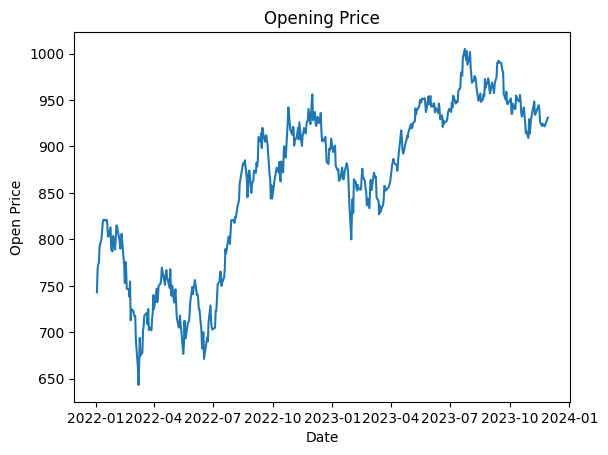

In [39]:
plt.figure()
plt.title('Opening Price')
plt.plot(df['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

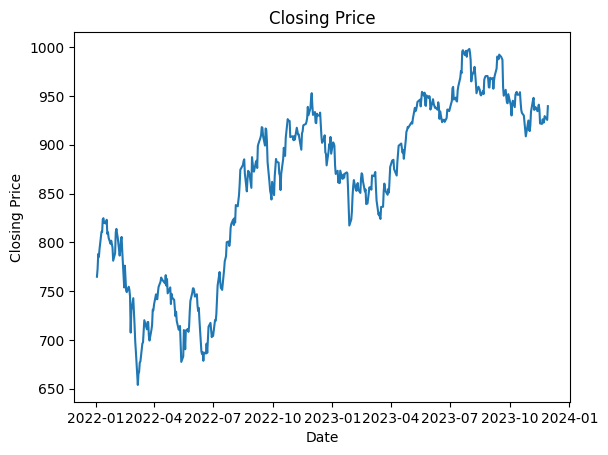

In [43]:
plt.figure()
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

Text(0.5, 0, 'Year')

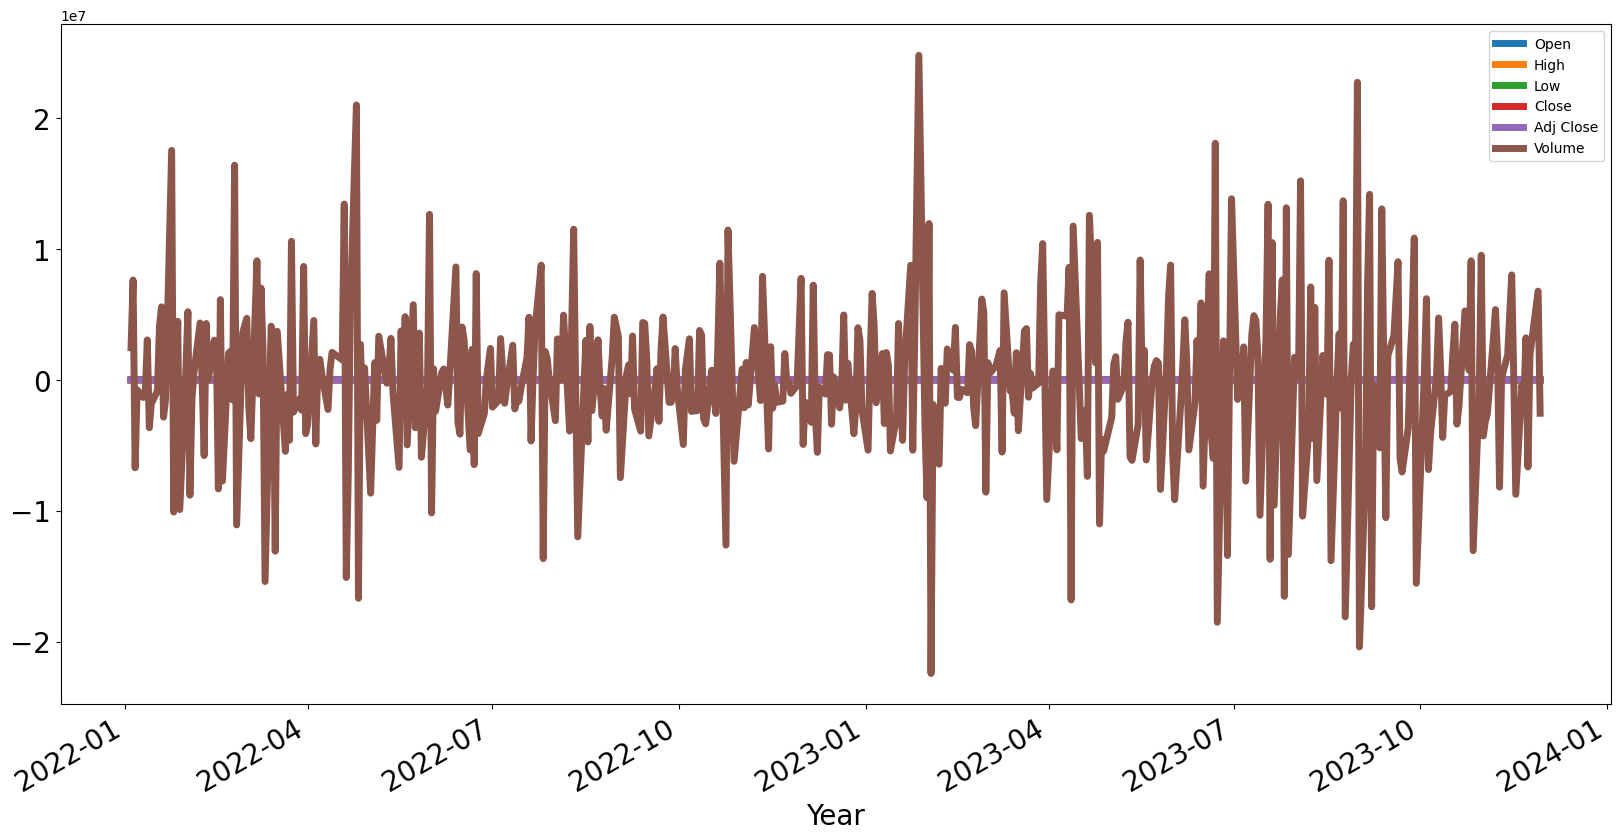

In [63]:
#First-order differencing
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 1.0, 'ICICIBANK Cumulative Returns')

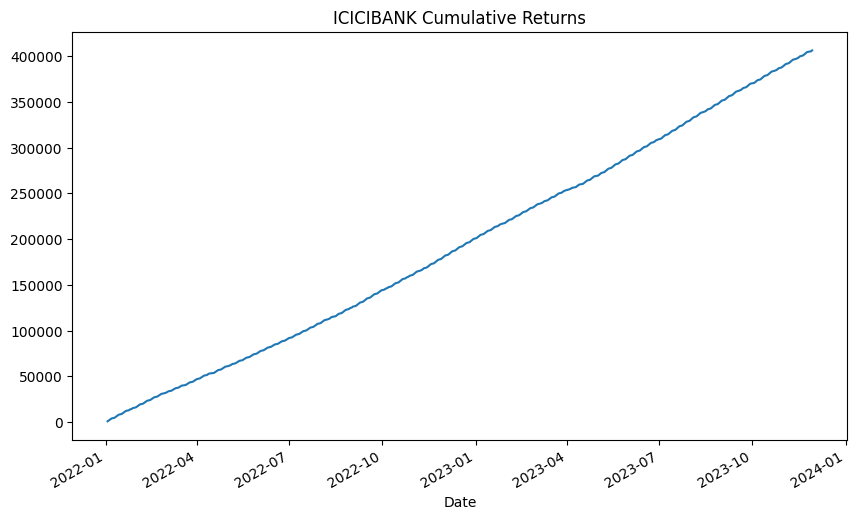

In [65]:
# Comulative Return
dr = df['Close'].cumsum()
dr.plot()
plt.title('ICICIBANK Cumulative Returns')

Text(0.5, 1.0, 'ICICIBANK Autocorrelation plot')

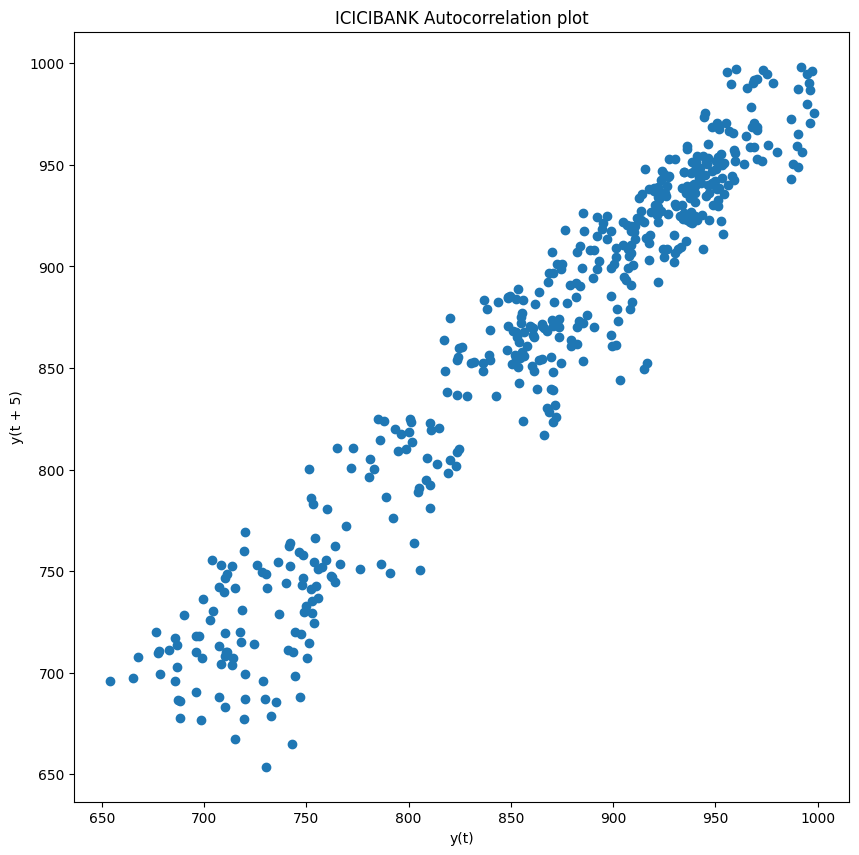

In [70]:
plt.figure(figsize=(10,10))
lag_plot(df['Close'], lag=5)
plt.title('ICICIBANK Autocorrelation plot')

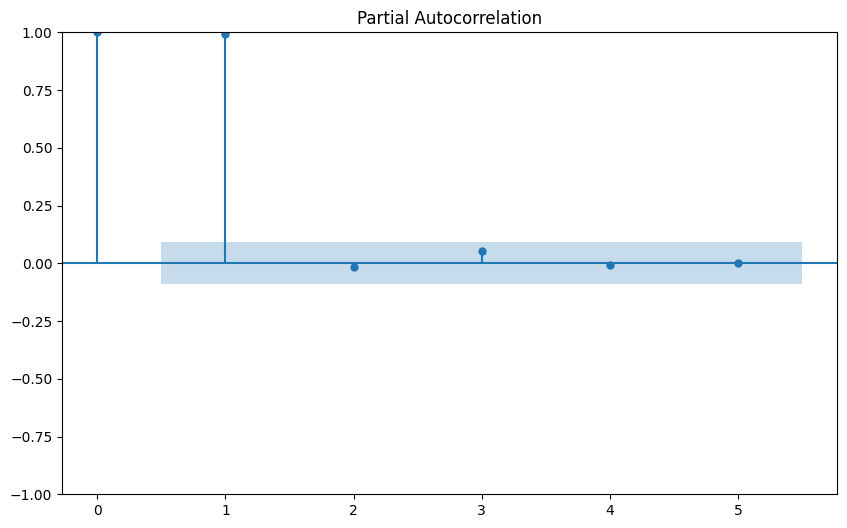

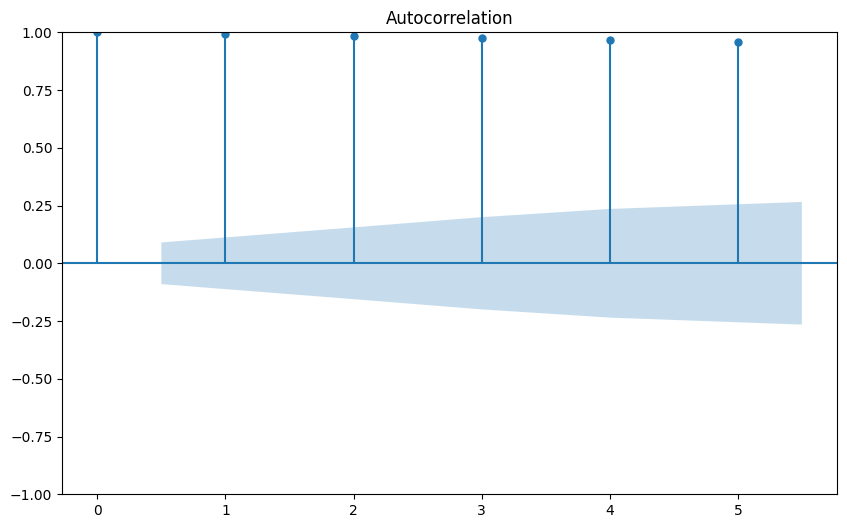

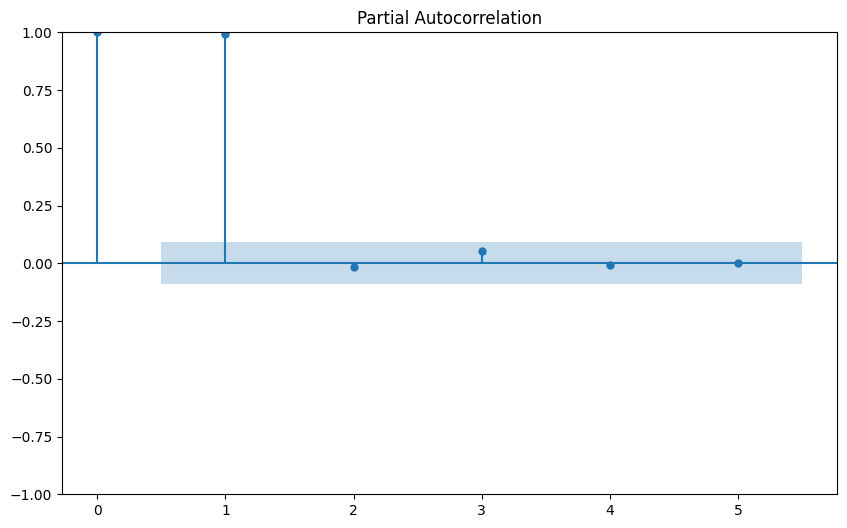

In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Close'], lags=5)
plot_pacf(df['Close'], lags=5)

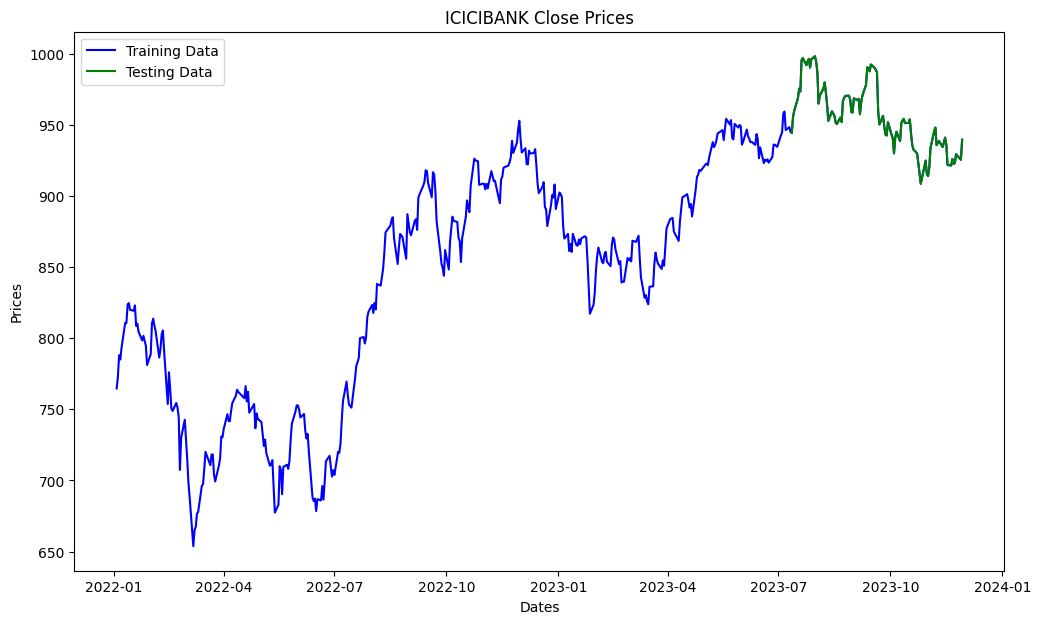

In [74]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('ICICIBANK Close Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

In [83]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = ARIMA(history, order=(5, 1, 2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)




<class 'list'>


In [89]:
error = mean_squared_error(test_ar, predictions)
print('MSE: %.3f' % error)

error2 = smape_kun(test_ar, predictions)
print('SMAE: %.3f' % error2)


rmse = np.sqrt(mean_squared_error(test_ar, predictions))
mae = mean_absolute_error(test_ar, predictions)

print("RMSE:", rmse)
print("MAE:", mae)


MSE: 66.566
SMAE: 0.665
RMSE: 8.158798046132802
MAE: 6.3458226529376525


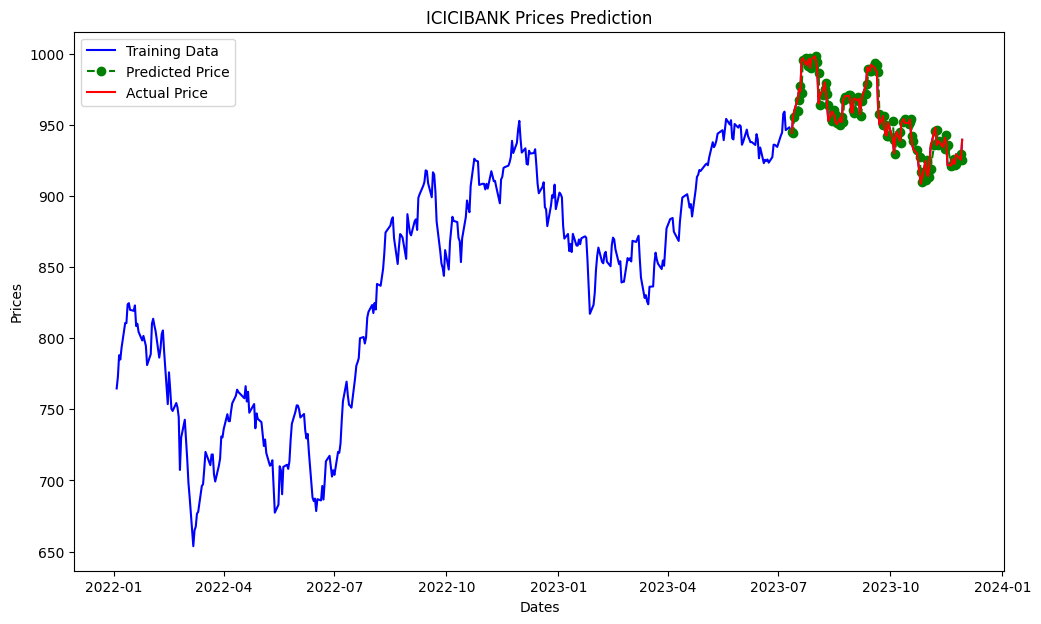

In [77]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('ICICIBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

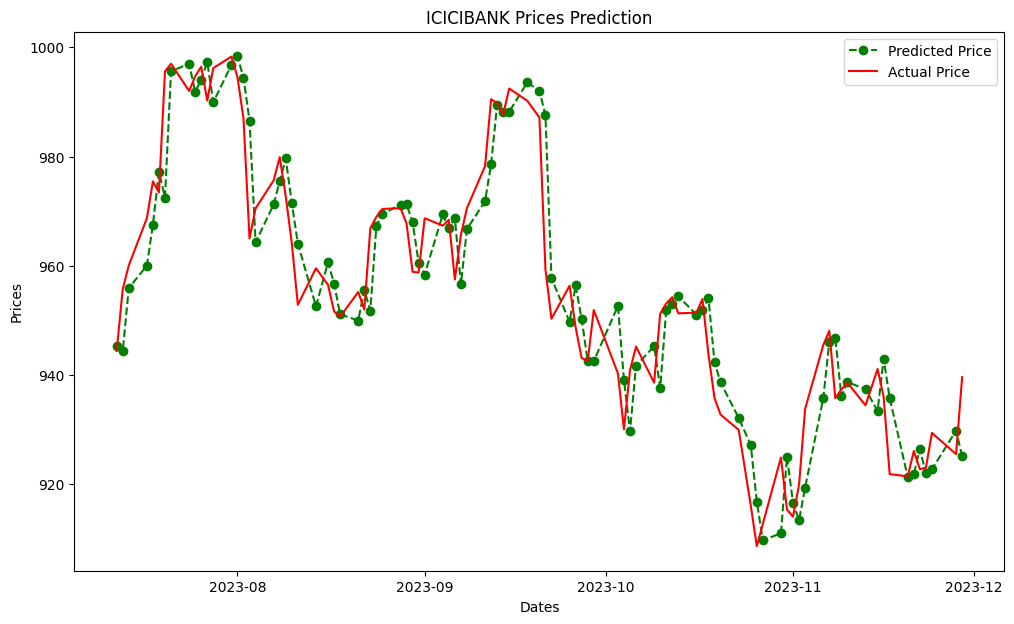

In [79]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('ICICIBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [80]:
actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Actual"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
print(output.head(10))

       Actual   Predicted
0  944.400024  945.259407
1  955.700012  944.348876
2  960.049988  955.901694
3  968.700012  960.033693
4  975.450012  967.508417
5  973.450012  977.232943
6  995.599976  972.493729
7  997.000000  995.605771
8  992.000000  996.999161
9  994.700012  991.833386


<h1><b>STOCK VALUE PREDICTED FOR TOMORROW<b></h1>

In [81]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# Using the entire dataset to train the model
model = ARIMA(train_ar, order=(5, 1, 2))
model_fit = model.fit()

# Forecasting one step ahead (for tomorrow)
forecast = model_fit.forecast(steps=1)
predicted_value_tomorrow = forecast[0]

print('Predicted Stock Value for Tomorrow:', predicted_value_tomorrow)


Predicted Stock Value for Tomorrow: 945.259407301898


<h1><b>Getting Predictions for 60 days from now<b></h1>

In [82]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# Using the entire dataset to train the model
model = ARIMA(train_ar, order=(5, 1, 2))
model_fit = model.fit()

# Forecasting 60 days ahead
forecast = model_fit.forecast(steps=60)
predicted_values_60_days = forecast

print('Predicted Stock Values for the Next 60 Days:', predicted_values_60_days)


Predicted Stock Values for the Next 60 Days: [945.2594073  945.29471707 944.97117749 945.03499351 944.85182478
 944.89531946 944.85342384 944.85740077 944.84873985 944.84498019
 944.84465419 944.84268046 944.84288672 944.84215865 944.84215553
 944.8419819  944.84194052 944.84191043 944.84188241 944.84187773
 944.84186678 944.84186548 944.84186223 944.8418614  944.8418606
 944.84186016 944.84185998 944.8418598  944.84185975 944.84185969
 944.84185967 944.84185966 944.84185965 944.84185964 944.84185964
 944.84185964 944.84185964 944.84185964 944.84185964 944.84185964
 944.84185964 944.84185964 944.84185964 944.84185964 944.84185964
 944.84185964 944.84185964 944.84185964 944.84185964 944.84185964
 944.84185964 944.84185964 944.84185964 944.84185964 944.84185964
 944.84185964 944.84185964 944.84185964 944.84185964 944.84185964]
